# **Toilets: Public Libraries**

This notebook explores the locations of public libraries in Los Angeles City & County. As a publicly available resource, libraries have restrooms on site and are an alternative option to teh scarce publicly available toilets throughout the City. For the purposes of this notebook, we are analyzing data from the Los Angeles Public library system as well as LA County Library since they are the two branches found throughout LA City. 

**Accessing Data from Library Systems**

First we will begin by extracting some branch information from the Los Angeles County Library API.

In [9]:
#First I will create a pandas dataframe (countylib) of all LA County Library locations, including their name, hours, and the other information that is returned from the branch information API.

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacounty.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacounty.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("nrtn-ga3s", limit=2000)

# Convert to pandas DataFrame
countylib = pd.DataFrame.from_records(results)

In [10]:
countylib

,sup_dist,cost_code,library_name,city,zip_code,square_footage,year_built,mon,tue,wed,thur,fri,sat,sun,collection_size,address_and_location,:@computed_region_x8wy_s94z
0,1,604,Anthony Quinn,Los Angeles,90063,7275,1973,11-8,11-8,11-6,11-6,11-5,11-5,Closed,48134,"{'latitude': '34.0408', 'longitude': '-118.18', 'human_address': '{""address"": ""3965 Cesar E. Chavez Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}'}",24028
1,1,803,Baldwin Park,Baldwin Park,91706,15555,1969,Closed,12-8,1-8,1-8,10-5,10-5,Closed,64948,"{'latitude': '34.0881', 'longitude': '-117.966', 'human_address': '{""address"": ""4181 Baldwin Park Blvd."", ""city"": ""Baldwin Park"", ""state"": """", ""zip"": """"}'}",8895
2,1,630,Bell,Bell,90201,4863,1960,Closed,10-8,10-6,11-5,11-5,12-5,Closed,36396,"{'latitude': '33.9783', 'longitude': '-118.189', 'human_address': '{""address"": ""4411 E. Gage Ave."", ""city"": ""Bell"", ""state"": """", ""zip"": """"}'}",24345
3,1,631,Bell Gardens,Bell Gardens,90201,5119,1968,Closed,10-7,10-7,10-7,10-6,10-5,Closed,34771,"{'latitude': '33.9672', 'longitude': '-118.151', 'human_address': '{""address"": ""7110 S. Garfield Ave."", ""city"": ""Bell Gardens"", ""state"": """", ""zip"": """"}'}",24345
4,1,616,Chet Holifield,Montebello,90640,5500,1969,12-7,12-7,11-6,11-6,Closed,Closed,Closed,31346,"{'latitude': '33.9935', 'longitude': '-118.12', 'human_address': '{""address"": ""1060 S. Greenwood Ave."", ""city"": ""Montebello"", ""state"": """", ""zip"": """"}'}",25733
5,1,610,City Terrace,Los Angeles,90063,8007,1979,11-6,11-6,11-8,11-8,11-5,11-5,Closed,48350,"{'latitude': '34.0557', 'longitude': '-118.178', 'human_address': '{""address"": ""4025 E. City Terrace Dr."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}'}",24028
6,1,804,Claremont,Claremont,91711,22921,1971,1-8,1-8,11-8,11-8,10-5,10-5,1-5,124665,"{'latitude': '34.0959', 'longitude': '-117.716', 'human_address': '{""address"": ""208 N. Harvard Ave."", ""city"": ""Claremont"", ""state"": """", ""zip"": """"}'}",8900
7,1,632,Cudahy,Cudahy,90201,4396,1968,Closed,10-8,10-8,10-8,8-6,8-6,Closed,23081,"{'latitude': '33.9593', 'longitude': '-118.175', 'human_address': '{""address"": ""5218 Santa Ana St."", ""city"": ""Cudahy"", ""state"": """", ""zip"": """"}'}",24345
8,1,605,East Los Angeles,Los Angeles,90022,26300,2004,10-9,10-9,10-9,10-9,9-5,10-5,1-5,138790,"{'latitude': '34.0337', 'longitude': '-118.16', 'human_address': '{""address"": ""4837 E. Third St."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}'}",23440
9,1,609,El Camino Real,Los Angeles,90023,5500,1971,11-7,11-7,10-6,10-6,11-5,11-5,Closed,39949,"{'latitude': '34.0237', 'longitude': '-118.178', 'human_address': '{""address"": ""4264 E. Whittier Blvd."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}'}",23441


In [11]:
countylib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sup_dist                     85 non-null     object
 1   cost_code                    85 non-null     object
 2   library_name                 85 non-null     object
 3   city                         85 non-null     object
 4   zip_code                     85 non-null     object
 5   square_footage               85 non-null     object
 6   year_built                   85 non-null     object
 7   mon                          85 non-null     object
 8   tue                          85 non-null     object
 9   wed                          85 non-null     object
 10  thur                         85 non-null     object
 11  fri                          85 non-null     object
 12  sat                          85 non-null     object
 13  sun                          85 non-n

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [13]:
countylib.address_and_location

0          {'latitude': '34.0408', 'longitude': '-118.18', 'human_address': '{"address": "3965 Cesar E. Chavez Ave.", "city": "Los Angeles", "state": "", "zip": ""}'}
1          {'latitude': '34.0881', 'longitude': '-117.966', 'human_address': '{"address": "4181 Baldwin Park Blvd.", "city": "Baldwin Park", "state": "", "zip": ""}'}
2                        {'latitude': '33.9783', 'longitude': '-118.189', 'human_address': '{"address": "4411 E. Gage Ave.", "city": "Bell", "state": "", "zip": ""}'}
3            {'latitude': '33.9672', 'longitude': '-118.151', 'human_address': '{"address": "7110 S. Garfield Ave.", "city": "Bell Gardens", "state": "", "zip": ""}'}
4              {'latitude': '33.9935', 'longitude': '-118.12', 'human_address': '{"address": "1060 S. Greenwood Ave.", "city": "Montebello", "state": "", "zip": ""}'}
5          {'latitude': '34.0557', 'longitude': '-118.178', 'human_address': '{"address": "4025 E. City Terrace Dr.", "city": "Los Angeles", "state": "", "zip": ""}'

Based on the the output, I can see that address and location (lat/lon) are all embedded in a dictionary. The column is set as an object, and not a string or float which could be converted into a geometry. Next, I'll try to try to extract the information from the dictionary using BeautifulSoup. 

In [14]:
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://data.lacounty.gov/resource/nrtn-ga3s.json' # copied and pasted from the webpage
r = requests.get(url)
df = pd.DataFrame(json.loads(r.text))

df = df.head() # get the first 5 rows, so we don't overload the city's website.
df

,sup_dist,cost_code,library_name,city,zip_code,square_footage,year_built,mon,tue,wed,thur,fri,sat,sun,collection_size,address_and_location,:@computed_region_x8wy_s94z
0,1,604,Anthony Quinn,Los Angeles,90063,7275,1973,11-8,11-8,11-6,11-6,11-5,11-5,Closed,48134,"{'latitude': '34.0408', 'longitude': '-118.18', 'human_address': '{""address"": ""3965 Cesar E. Chavez Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}'}",24028
1,1,803,Baldwin Park,Baldwin Park,91706,15555,1969,Closed,12-8,1-8,1-8,10-5,10-5,Closed,64948,"{'latitude': '34.0881', 'longitude': '-117.966', 'human_address': '{""address"": ""4181 Baldwin Park Blvd."", ""city"": ""Baldwin Park"", ""state"": """", ""zip"": """"}'}",8895
2,1,630,Bell,Bell,90201,4863,1960,Closed,10-8,10-6,11-5,11-5,12-5,Closed,36396,"{'latitude': '33.9783', 'longitude': '-118.189', 'human_address': '{""address"": ""4411 E. Gage Ave."", ""city"": ""Bell"", ""state"": """", ""zip"": """"}'}",24345
3,1,631,Bell Gardens,Bell Gardens,90201,5119,1968,Closed,10-7,10-7,10-7,10-6,10-5,Closed,34771,"{'latitude': '33.9672', 'longitude': '-118.151', 'human_address': '{""address"": ""7110 S. Garfield Ave."", ""city"": ""Bell Gardens"", ""state"": """", ""zip"": """"}'}",24345
4,1,616,Chet Holifield,Montebello,90640,5500,1969,12-7,12-7,11-6,11-6,Closed,Closed,Closed,31346,"{'latitude': '33.9935', 'longitude': '-118.12', 'human_address': '{""address"": ""1060 S. Greenwood Ave."", ""city"": ""Montebello"", ""state"": """", ""zip"": """"}'}",25733


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sup_dist                     5 non-null      object
 1   cost_code                    5 non-null      object
 2   library_name                 5 non-null      object
 3   city                         5 non-null      object
 4   zip_code                     5 non-null      object
 5   square_footage               5 non-null      object
 6   year_built                   5 non-null      object
 7   mon                          5 non-null      object
 8   tue                          5 non-null      object
 9   wed                          5 non-null      object
 10  thur                         5 non-null      object
 11  fri                          5 non-null      object
 12  sat                          5 non-null      object
 13  sun                          5 non-null

In [16]:
urldict = df.loc[0,'link']
print(urldict)

KeyError: 'link'

I can see that BeautifulSoup will not be helpful in this situation because it works for web scarpping. In this case, I just need to extract information from a dictionary, so I'll do some parsing insetad. 

**Parsing a Dictionary**

In [17]:
#the following code will allow me parse the dictionary found in the 'address_and_location' column. This way the data will be broken up into different coulumns.
countylib = countylib.drop('address_and_location', 1).assign(**pd.DataFrame(countylib.address_and_location.values.tolist()))

C:\Users\User\AppData\Local\Temp\ipykernel_17144\36916103.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  countylib = countylib.drop('address_and_location', 1).assign(**pd.DataFrame(countylib.address_and_location.values.tolist()))


In [34]:
#Here I can see that I now have a column for Latiude and Longitude
countylib

,sup_dist,cost_code,library_name,city,zip_code,square_footage,year_built,mon,tue,wed,thur,fri,sat,sun,collection_size,:@computed_region_x8wy_s94z,latitude,longitude,human_address,geometry
0,1,604,Anthony Quinn,Los Angeles,90063,7275,1973,11-8,11-8,11-6,11-6,11-5,11-5,Closed,48134,24028,34.0408,-118.180,"{""address"": ""3965 Cesar E. Chavez Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.18000 34.04080)
5,1,610,City Terrace,Los Angeles,90063,8007,1979,11-6,11-6,11-8,11-8,11-5,11-5,Closed,48350,24028,34.0557,-118.178,"{""address"": ""4025 E. City Terrace Dr."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.17800 34.05570)
8,1,605,East Los Angeles,Los Angeles,90022,26300,2004,10-9,10-9,10-9,10-9,9-5,10-5,1-5,138790,23440,34.0337,-118.160,"{""address"": ""4837 E. Third St."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.16000 34.03370)
9,1,609,El Camino Real,Los Angeles,90023,5500,1971,11-7,11-7,10-6,10-6,11-5,11-5,Closed,39949,23441,34.0237,-118.178,"{""address"": ""4264 E. Whittier Blvd."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.17800 34.02370)
25,2,530,A C Bilbrew,Los Angeles,90061,21843,1974,Closed,2-6,2-6,2-6,2-6,11-3,Closed,77306,24355,33.9158,-118.272,"{""address"": ""150 E. El Segundo Blvd."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.27200 33.91580)
31,2,533,Florence,Los Angeles,90001,5124,1970,11-7,11-8,11-8,11-5,11-5,11-5,Closed,52201,22350,33.9744,-118.245,"{""address"": ""1610 E. Florence Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.24500 33.97440)
33,2,534,Graham,Los Angeles,90001,5125,1969,11-8,11-8,11-6,11-6,11-5,11-5,Closed,50738,22351,33.9599,-118.238,"{""address"": ""1900 E. Firestone Blvd."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.23800 33.95990)
39,2,336,View Park,Los Angeles,90043,6983,1977,11-7,11-7,11-7,10-6,10-5,10-5,Closed,46560,23674,33.9928,-118.341,"{""address"": ""3854 W. 54th St."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.34100 33.99280)
40,2,535,Willowbrook,Los Angeles,90059,2200,1988,10-6,12-8,10-6,10-6,11-5,11-5,Closed,28403,24354,33.9257,-118.239,"{""address"": ""11838 Wilmington Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.23900 33.92570)
42,2,338,Woodcrest,Los Angeles,90044,7254,1967,10-6,10-6,10-6,10-6,10-6,10-5,Closed,56525,23675,33.9400,-118.300,"{""address"": ""1340 W. 106th St."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}",POINT (-118.30000 33.94000)


In [19]:
# I can also see the data type is object, so before I convert it to the geodataframe, i will convert the lat/lon to float.
countylib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sup_dist                     85 non-null     object
 1   cost_code                    85 non-null     object
 2   library_name                 85 non-null     object
 3   city                         85 non-null     object
 4   zip_code                     85 non-null     object
 5   square_footage               85 non-null     object
 6   year_built                   85 non-null     object
 7   mon                          85 non-null     object
 8   tue                          85 non-null     object
 9   wed                          85 non-null     object
 10  thur                         85 non-null     object
 11  fri                          85 non-null     object
 12  sat                          85 non-null     object
 13  sun                          85 non-n

In [20]:
countylib['latitude'] =  countylib.latitude.astype(float)
countylib['longitude']= countylib.longitude.astype(float)

In [21]:
# Since countylib includes all the libaries in LA County, I will isolate the ones that are in the City of Los Angeles ONLY
countylib = countylib[countylib.city == 'Los Angeles']
countylib

,sup_dist,cost_code,library_name,city,zip_code,square_footage,year_built,mon,tue,wed,thur,fri,sat,sun,collection_size,:@computed_region_x8wy_s94z,latitude,longitude,human_address
0,1,604,Anthony Quinn,Los Angeles,90063,7275,1973,11-8,11-8,11-6,11-6,11-5,11-5,Closed,48134,24028,34.0408,-118.180,"{""address"": ""3965 Cesar E. Chavez Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
5,1,610,City Terrace,Los Angeles,90063,8007,1979,11-6,11-6,11-8,11-8,11-5,11-5,Closed,48350,24028,34.0557,-118.178,"{""address"": ""4025 E. City Terrace Dr."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
8,1,605,East Los Angeles,Los Angeles,90022,26300,2004,10-9,10-9,10-9,10-9,9-5,10-5,1-5,138790,23440,34.0337,-118.160,"{""address"": ""4837 E. Third St."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
9,1,609,El Camino Real,Los Angeles,90023,5500,1971,11-7,11-7,10-6,10-6,11-5,11-5,Closed,39949,23441,34.0237,-118.178,"{""address"": ""4264 E. Whittier Blvd."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
25,2,530,A C Bilbrew,Los Angeles,90061,21843,1974,Closed,2-6,2-6,2-6,2-6,11-3,Closed,77306,24355,33.9158,-118.272,"{""address"": ""150 E. El Segundo Blvd."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
31,2,533,Florence,Los Angeles,90001,5124,1970,11-7,11-8,11-8,11-5,11-5,11-5,Closed,52201,22350,33.9744,-118.245,"{""address"": ""1610 E. Florence Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
33,2,534,Graham,Los Angeles,90001,5125,1969,11-8,11-8,11-6,11-6,11-5,11-5,Closed,50738,22351,33.9599,-118.238,"{""address"": ""1900 E. Firestone Blvd."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
39,2,336,View Park,Los Angeles,90043,6983,1977,11-7,11-7,11-7,10-6,10-5,10-5,Closed,46560,23674,33.9928,-118.341,"{""address"": ""3854 W. 54th St."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
40,2,535,Willowbrook,Los Angeles,90059,2200,1988,10-6,12-8,10-6,10-6,11-5,11-5,Closed,28403,24354,33.9257,-118.239,"{""address"": ""11838 Wilmington Ave."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"
42,2,338,Woodcrest,Los Angeles,90044,7254,1967,10-6,10-6,10-6,10-6,10-6,10-5,Closed,56525,23675,33.9400,-118.300,"{""address"": ""1340 W. 106th St."", ""city"": ""Los Angeles"", ""state"": """", ""zip"": """"}"


In [46]:
# My dataframe includes information I won't need, so I will drop any columns that won't be used by dropping unnecessary coulumns and add a column to label it "County Library" so we know where the data comes from
countylib2 = countylib[['library_name','latitude','longitude']]

#rename library_name to branch_name
countylib2.rename(columns={"library_name": "branch_name"}, inplace=True)

#add a column to specify type
countylib2['type'] = 'LA County Library'
countylib2

C:\Users\User\AppData\Local\Temp\ipykernel_17144\438376465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countylib2.rename(columns={"library_name": "branch_name"}, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17144\438376465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countylib2['type'] = 'LA County Library'


,branch_name,latitude,longitude,type
0,Anthony Quinn,34.0408,-118.180,LA County Library
5,City Terrace,34.0557,-118.178,LA County Library
8,East Los Angeles,34.0337,-118.160,LA County Library
9,El Camino Real,34.0237,-118.178,LA County Library
25,A C Bilbrew,33.9158,-118.272,LA County Library
31,Florence,33.9744,-118.245,LA County Library
33,Graham,33.9599,-118.238,LA County Library
39,View Park,33.9928,-118.341,LA County Library
40,Willowbrook,33.9257,-118.239,LA County Library
42,Woodcrest,33.9400,-118.300,LA County Library


In [49]:
#now I can convert to to a geodataframe
import geopandas as gpd

countyGdf = gpd.GeoDataFrame(
    countylib2, geometry=gpd.points_from_xy(countylib2.longitude, countylib2.latitude, 
                                          crs='EPSG:4326'))
countyGdf

,branch_name,latitude,longitude,type,geometry
0,Anthony Quinn,34.0408,-118.180,LA County Library,POINT (-118.18000 34.04080)
5,City Terrace,34.0557,-118.178,LA County Library,POINT (-118.17800 34.05570)
8,East Los Angeles,34.0337,-118.160,LA County Library,POINT (-118.16000 34.03370)
9,El Camino Real,34.0237,-118.178,LA County Library,POINT (-118.17800 34.02370)
25,A C Bilbrew,33.9158,-118.272,LA County Library,POINT (-118.27200 33.91580)
31,Florence,33.9744,-118.245,LA County Library,POINT (-118.24500 33.97440)
33,Graham,33.9599,-118.238,LA County Library,POINT (-118.23800 33.95990)
39,View Park,33.9928,-118.341,LA County Library,POINT (-118.34100 33.99280)
40,Willowbrook,33.9257,-118.239,LA County Library,POINT (-118.23900 33.92570)
42,Woodcrest,33.9400,-118.300,LA County Library,POINT (-118.30000 33.94000)


<AxesSubplot:>

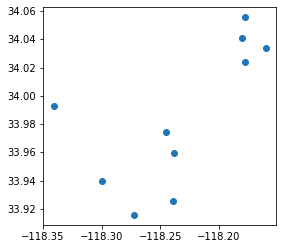

In [23]:
countyGdf.plot()

**Next, I will bring in LA City Library data**

In [24]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacity.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("a4nt-4gca", limit=2000)

# Convert to pandas DataFrame
citylib = pd.DataFrame.from_records(results)

In [25]:
citylib

,branch_name,phone_number,email,council_district,location,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s
0,Vermont Square,(323) 290-7405,vmtsqr@lapl.org,9,"{'latitude': '33.999699', 'longitude': '-118.295799', 'human_address': '{""address"": ""1201 W. 48th. Street"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90037""}'}",23668,740,1154,7,13,2
1,Vernon - Leon H. Washington Jr. Memorial,(323) 234-9106,vrnonl@lapl.org,9,"{'latitude': '34.002701', 'longitude': '-118.256104', 'human_address': '{""address"": ""4504 S. Central Avenue"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90011""}'}",22727,718,563,7,13,51
2,Washington Irving,(323) 734-6303,wirvng@lapl.org,10,"{'latitude': '34.039951', 'longitude': '-118.329147', 'human_address': '{""address"": ""4117 W. Washington Boulevard"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90018""}'}",23080,648,1105,NaN,12,19
3,West Los Angeles Regional,(310) 575-8323,westla@lapl.org,11,"{'latitude': '34.0457', 'longitude': '-118.450302', 'human_address': '{""address"": ""11360 Santa Monica Boulevard"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90025""}'}",23443,861,746,9,10,50
4,West Valley Regional,(818) 345-9806,wvally@lapl.org,3,"{'latitude': '34.193604', 'longitude': '-118.546898', 'human_address': '{""address"": ""19036 Vanowen Street"", ""city"": ""Reseda"", ""state"": ""CA"", ""zip"": ""91335""}'}",18909,266,309,NaN,4,12
5,Westchester - Loyola Village,(310) 348-1096,wstchs@lapl.org,11,"{'latitude': '33.95945', 'longitude': '-118.417999', 'human_address': '{""address"": ""7114 W. Manchester Avenue"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90045""}'}",23676,936,791,10,10,16
6,Westwood,(310) 474-1739,wwood@lapl.org,5,"{'latitude': '34.0583', 'longitude': '-118.442001', 'human_address': '{""address"": ""1246 Glendon Avenue"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90024""}'}",23442,854,742,9,6,72
7,Wilshire,(323) 957-4550,wlshre@lapl.org,4,"{'latitude': '34.074299', 'longitude': '-118.311501', 'human_address': '{""address"": ""149 N. Saint Andrews Pl"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90004""}'}",22721,587,848,NaN,7,86
8,Woodland Hills,(818) 226-0017,woodln@lapl.org,3,"{'latitude': '34.168499', 'longitude': '-118.610603', 'human_address': '{""address"": ""22200 Ventura Boulevard"", ""city"": ""Woodland Hills"", ""state"": ""CA"", ""zip"": ""91364""}'}",19346,309,1486,6,4,49
9,Central Library,(213) 228-7000,infonow@lapl.org,9,"{'latitude': '34.050499', 'longitude': '-118.255302', 'human_address': '{""address"": ""630 W. 5th Street"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90071""}'}",23078,546,733,NaN,9,76


In [26]:
#the following code will allow me parse the dictionary found in the 'address_and_location' column. This way the data will be broken up into different coulumns.
citylib = citylib.drop('location', 1).assign(**pd.DataFrame(citylib.location.values.tolist()))
citylib

C:\Users\User\AppData\Local\Temp\ipykernel_17144\1525357794.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  citylib = citylib.drop('location', 1).assign(**pd.DataFrame(citylib.location.values.tolist()))


,branch_name,phone_number,email,council_district,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,latitude,longitude,human_address
0,Vermont Square,(323) 290-7405,vmtsqr@lapl.org,9,23668,740,1154,7,13,2,33.999699,-118.295799,"{""address"": ""1201 W. 48th. Street"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90037""}"
1,Vernon - Leon H. Washington Jr. Memorial,(323) 234-9106,vrnonl@lapl.org,9,22727,718,563,7,13,51,34.002701,-118.256104,"{""address"": ""4504 S. Central Avenue"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90011""}"
2,Washington Irving,(323) 734-6303,wirvng@lapl.org,10,23080,648,1105,NaN,12,19,34.039951,-118.329147,"{""address"": ""4117 W. Washington Boulevard"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90018""}"
3,West Los Angeles Regional,(310) 575-8323,westla@lapl.org,11,23443,861,746,9,10,50,34.0457,-118.450302,"{""address"": ""11360 Santa Monica Boulevard"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90025""}"
4,West Valley Regional,(818) 345-9806,wvally@lapl.org,3,18909,266,309,NaN,4,12,34.193604,-118.546898,"{""address"": ""19036 Vanowen Street"", ""city"": ""Reseda"", ""state"": ""CA"", ""zip"": ""91335""}"
5,Westchester - Loyola Village,(310) 348-1096,wstchs@lapl.org,11,23676,936,791,10,10,16,33.95945,-118.417999,"{""address"": ""7114 W. Manchester Avenue"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90045""}"
6,Westwood,(310) 474-1739,wwood@lapl.org,5,23442,854,742,9,6,72,34.0583,-118.442001,"{""address"": ""1246 Glendon Avenue"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90024""}"
7,Wilshire,(323) 957-4550,wlshre@lapl.org,4,22721,587,848,NaN,7,86,34.074299,-118.311501,"{""address"": ""149 N. Saint Andrews Pl"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90004""}"
8,Woodland Hills,(818) 226-0017,woodln@lapl.org,3,19346,309,1486,6,4,49,34.168499,-118.610603,"{""address"": ""22200 Ventura Boulevard"", ""city"": ""Woodland Hills"", ""state"": ""CA"", ""zip"": ""91364""}"
9,Central Library,(213) 228-7000,infonow@lapl.org,9,23078,546,733,NaN,9,76,34.050499,-118.255302,"{""address"": ""630 W. 5th Street"", ""city"": ""Los Angeles"", ""state"": ""CA"", ""zip"": ""90071""}"


In [27]:
citylib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   branch_name                  73 non-null     object
 1   phone_number                 73 non-null     object
 2   email                        73 non-null     object
 3   council_district             73 non-null     object
 4   :@computed_region_qz3q_ghft  73 non-null     object
 5   :@computed_region_k96s_3jcv  73 non-null     object
 6   :@computed_region_tatf_ua23  73 non-null     object
 7   :@computed_region_ur2y_g4cx  27 non-null     object
 8   :@computed_region_kqwf_mjcx  73 non-null     object
 9   :@computed_region_2dna_qi2s  70 non-null     object
 10  latitude                     73 non-null     object
 11  longitude                    73 non-null     object
 12  human_address                73 non-null     object
dtypes: object(13)
memory usage: 7.5+ KB


In [28]:
citylib['latitude'] =  citylib.latitude.astype(float)
citylib['longitude']= citylib.longitude.astype(float)

In [47]:
#I will only keep the columns I need, this way joining with the county data will be more clean
citylib2 = citylib[['branch_name','latitude','longitude']]

#add a column to specify type
citylib2['type'] = 'LA City Library'
citylib2

C:\Users\User\AppData\Local\Temp\ipykernel_17144\919827648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citylib2['type'] = 'LA City Library'


,branch_name,latitude,longitude,type
0,Vermont Square,33.999699,-118.295799,LA City Library
1,Vernon - Leon H. Washington Jr. Memorial,34.002701,-118.256104,LA City Library
2,Washington Irving,34.039951,-118.329147,LA City Library
3,West Los Angeles Regional,34.045700,-118.450302,LA City Library
4,West Valley Regional,34.193604,-118.546898,LA City Library
5,Westchester - Loyola Village,33.959450,-118.417999,LA City Library
6,Westwood,34.058300,-118.442001,LA City Library
7,Wilshire,34.074299,-118.311501,LA City Library
8,Woodland Hills,34.168499,-118.610603,LA City Library
9,Central Library,34.050499,-118.255302,LA City Library


In [50]:
#convert to geodataframe
cityGdf = gpd.GeoDataFrame(
    citylib2, geometry=gpd.points_from_xy(citylib2.longitude, citylib2.latitude, 
                                          crs='EPSG:4326'))
cityGdf

,branch_name,latitude,longitude,type,geometry
0,Vermont Square,33.999699,-118.295799,LA City Library,POINT (-118.29580 33.99970)
1,Vernon - Leon H. Washington Jr. Memorial,34.002701,-118.256104,LA City Library,POINT (-118.25610 34.00270)
2,Washington Irving,34.039951,-118.329147,LA City Library,POINT (-118.32915 34.03995)
3,West Los Angeles Regional,34.045700,-118.450302,LA City Library,POINT (-118.45030 34.04570)
4,West Valley Regional,34.193604,-118.546898,LA City Library,POINT (-118.54690 34.19360)
5,Westchester - Loyola Village,33.959450,-118.417999,LA City Library,POINT (-118.41800 33.95945)
6,Westwood,34.058300,-118.442001,LA City Library,POINT (-118.44200 34.05830)
7,Wilshire,34.074299,-118.311501,LA City Library,POINT (-118.31150 34.07430)
8,Woodland Hills,34.168499,-118.610603,LA City Library,POINT (-118.61060 34.16850)
9,Central Library,34.050499,-118.255302,LA City Library,POINT (-118.25530 34.05050)


**Concatenate**

In [63]:
#concatenate the two gdfs
lalibs = pd.concat([countyGdf, cityGdf], axis=0)

In [52]:
lalibs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 0 to 72
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   branch_name  83 non-null     object  
 1   latitude     83 non-null     float64 
 2   longitude    83 non-null     float64 
 3   type         83 non-null     object  
 4   geometry     83 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 3.9+ KB


In [56]:
lalibs = lalibs.to_crs('EPSG:4326')
lalibs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
lalibs

,branch_name,latitude,longitude,type,geometry
0,Anthony Quinn,34.040800,-118.180000,LA County Library,POINT (-118.18000 34.04080)
5,City Terrace,34.055700,-118.178000,LA County Library,POINT (-118.17800 34.05570)
8,East Los Angeles,34.033700,-118.160000,LA County Library,POINT (-118.16000 34.03370)
9,El Camino Real,34.023700,-118.178000,LA County Library,POINT (-118.17800 34.02370)
25,A C Bilbrew,33.915800,-118.272000,LA County Library,POINT (-118.27200 33.91580)
31,Florence,33.974400,-118.245000,LA County Library,POINT (-118.24500 33.97440)
33,Graham,33.959900,-118.238000,LA County Library,POINT (-118.23800 33.95990)
39,View Park,33.992800,-118.341000,LA County Library,POINT (-118.34100 33.99280)
40,Willowbrook,33.925700,-118.239000,LA County Library,POINT (-118.23900 33.92570)
42,Woodcrest,33.940000,-118.300000,LA County Library,POINT (-118.30000 33.94000)


SSLError: HTTPSConnectionPool(host='a.basemaps.cartocdn.com', port=443): Max retries exceeded with url: /light_all/5/15/15.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1131)')))

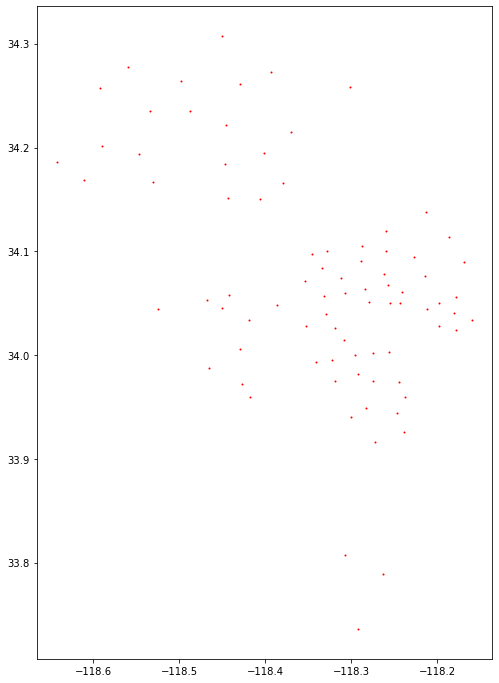

In [58]:
import contextily as ctx
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,12))

lalibs.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
#ax.axis('off')

# add a basemap
ctx.add_basemap (ax, zoom=5, source=ctx.providers.CartoDB.Positron)

In [65]:
#convert to geojson file

def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [66]:
cols = ['branch_name','latitude','longitude','type','geometry']
geojson = df_to_geojson(lalibs,cols)

In [67]:
geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'branch_name': 'Anthony Quinn',
    'latitude': 34.0408,
    'longitude': -118.18,
    'type': 'LA County Library',
    'geometry': <shapely.geometry.point.Point at 0x2254e2a1b20>},
   'geometry': {'type': 'Point', 'coordinates': [-118.18, 34.0408]}},
  {'type': 'Feature',
   'properties': {'branch_name': 'City Terrace',
    'latitude': 34.0557,
    'longitude': -118.178,
    'type': 'LA County Library',
    'geometry': <shapely.geometry.point.Point at 0x2254e2a1940>},
   'geometry': {'type': 'Point', 'coordinates': [-118.178, 34.0557]}},
  {'type': 'Feature',
   'properties': {'branch_name': 'East Los Angeles',
    'latitude': 34.0337,
    'longitude': -118.16,
    'type': 'LA County Library',
    'geometry': <shapely.geometry.point.Point at 0x2254efe59d0>},
   'geometry': {'type': 'Point', 'coordinates': [-118.16, 34.0337]}},
  {'type': 'Feature',
   'properties': {'branch_name': 'El Camino Real',
    '

In [70]:
#convert data to csv
lalibs.to_csv('lalibraries.csv')